In [22]:
from pylab import *

Text(0, 0.5, 'x')

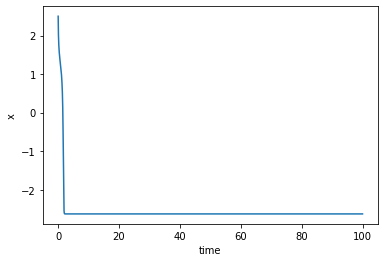

In [77]:
Dt = 0.01
def initialize():
    global x, t, xresult, tresult
    x = 2.5
    t = 0.0
    xresult = [x]
    tresult = [t]
def update():
    global x, t
    x = x + (k + r * x - x**3) * Dt
    t = t + Dt
def observe():
    global x, t, xresult, tresult
    xresult.append(x)
    tresult.append(t)

r = 5
k = -5
initialize()
while t < 100:
    update()
    observe()
plot(tresult, xresult)
xlabel('time')
ylabel('x')

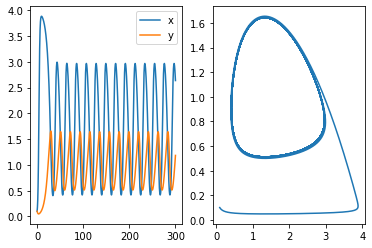

In [100]:
#dx/dt =   a x (1-x/K) – b Jx/(J+x) y
#dy/dt = - c y + d Jx/(J+x) y

Dt = 0.01
def initialize():
    global x, y, t, xresult, yresult, tresult
    x = 0.1
    y = 0.1
    t = 0.0
    xresult = [x]
    yresult = [y]
    tresult = [t]
def update():
    global x, y, t
    nx = x + (a*x*(1-x/K) - b*J*x/(J+x)*y) * Dt
    ny = y + (-c*y + d*J*x/(J+x)*y) * Dt
    x, y = nx, ny
    t = t + Dt
def observe():
    global x, y, t, xresult, yresult, tresult
    xresult.append(x)
    yresult.append(y)
    tresult.append(t)

a=1
b=1.5
c=0.5
d=1
J=0.8
K=4
initialize()
while t < 300:
    update()
    observe()
subplot(1, 2, 1)
plot(tresult, xresult, label = 'x')
plot(tresult, yresult, label = 'y')
legend()
subplot(1, 2, 2)
plot(xresult, yresult)

In [159]:
from sympy import *
init_printing()

In [160]:
x, y, a, b, c, d, J, K = symbols('x y a b c d J K')
xdot = a*x*(1-x/K) - b*J*x/(J+x)*y
ydot = -c*y + d*J*x/(J+x)*y

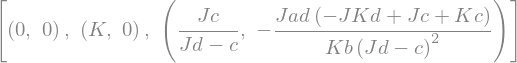

In [161]:
eqs = solve([xdot, ydot], (x, y))
eqs

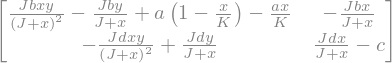

In [162]:
Jcb = Matrix([[diff(xdot, x), diff(xdot, y)], 
            [diff(ydot, x), diff(ydot, y)]])
Jcb

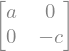

In [163]:
J0 = Jcb.subs([(x, 0), (y, 0)])
J0

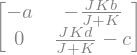

In [164]:
J1 = Jcb.subs([(x, K), (y, 0)])
J1

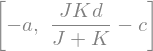

In [165]:
ev1 = list(J1.eigenvals().keys())
ev1

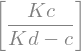

In [166]:
solve(ev1[1], J)

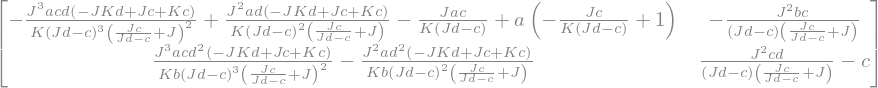

In [167]:
J2 = Jcb.subs([(x, eqs[2][0]), (y, eqs[2][1])])
J2

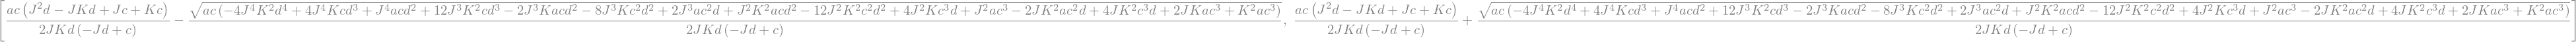

In [168]:
ev2 = list(J2.eigenvals().keys())
ev2

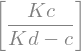

In [183]:
solve(ev2[0], J)

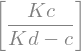

In [179]:
solve(ev2[1], J)

The above solutions do not consider cases where $\mathrm{Re}(\lambda) = 0$ while $\mathrm{Im}(\lambda) \ne 0$. Here, an alternative approach is to plot them for certain parameter values.

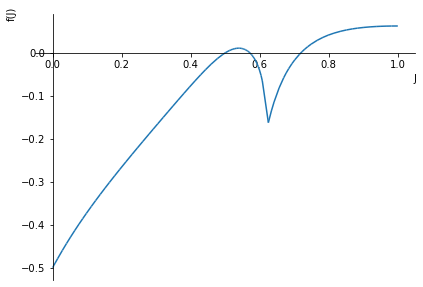

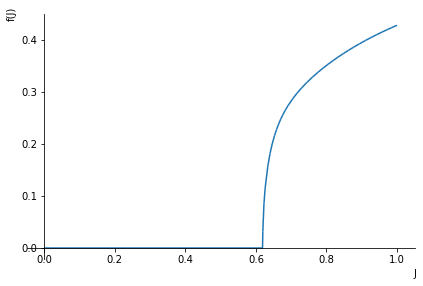

In [197]:
plot(re(ev2[0].subs([(a, 1), (b, 1.5), (c, 0.5), (d, 1), (K, 4)])), (J, 0, 1))
plot(im(ev2[0].subs([(a, 1), (b, 1.5), (c, 0.5), (d, 1), (K, 4)])), (J, 0, 1))